#**Ağ Anomalisi Tespiti**

# Hesaplarımız :
###Github -> https://github.com/meryemarpaci/YZVM-Machine-Learning-Project
###Trello -> https://trello.com/b/q8WCnXK9/yzvm-ml-project

#Gerekli Kütüphaneler

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

!pip install category_encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

!pip install klib
import klib as kl

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import itertools
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from pandas.api.types import is_numeric_dtype

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


# Veri Setine Genel Bakış

In [4]:
df = pd.read_csv("/content/Train_data.csv")

In [5]:
df.shape

(25193, 42)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [7]:
df.dtypes

duration                       float64
protocol_type                   object
service                         object
flag                            object
src_bytes                      float64
dst_bytes                      float64
land                           float64
wrong_fragment                 float64
urgent                         float64
hot                            float64
num_failed_logins              float64
logged_in                      float64
num_compromised                float64
root_shell                     float64
su_attempted                   float64
num_root                       float64
num_file_creations             float64
num_shells                     float64
num_access_files               float64
num_outbound_cmds              float64
is_host_login                  float64
is_guest_login                 float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate          

## Bazı Sütunların Özellikleri:

* Duration:  Bağlantı süresinin uzunluğu
* Protocol_type: Bağlantıda kullanılan protokol
* Service: Kullanılan hedef ağ hizmeti
* Flag: Bağlantı durumu - Normal veya Hata
* Src_bytes: Tek bağlantıda kaynaktan hedefe aktarılan veri baytlarının sayısı
* Dst_bytes: Tek bağlantıda hedeften kaynağa aktarılan veri baytlarının sayısı
* Land: kaynak ve hedef IP adresleri ve port numaraları eşitse, bu değişken 1 değerini alır, aksi takdirde 0
* Wrong_fragment: Bu bağlantıdaki toplam yanlış parça sayısı
* Urgent: Bu bağlantıdaki acil paketlerin sayısı. Acil paketler, acil biti etkinleştirilmiş paketlerdir


In [8]:
df.isnull().sum()

duration                       1
protocol_type                  1
service                        1
flag                           1
src_bytes                      1
dst_bytes                      1
land                           1
wrong_fragment                 1
urgent                         1
hot                            1
num_failed_logins              1
logged_in                      1
num_compromised                1
root_shell                     1
su_attempted                   1
num_root                       1
num_file_creations             1
num_shells                     1
num_access_files               1
num_outbound_cmds              1
is_host_login                  1
is_guest_login                 1
count                          1
srv_count                      1
serror_rate                    1
srv_serror_rate                1
rerror_rate                    1
srv_rerror_rate                1
same_srv_rate                  1
diff_srv_rate                  1
srv_diff_h

In [9]:
null_satir = df[df.isnull().any(axis=1)]
null_satir

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


167. satırdaki bütün sütunların boş değerlere sahip olduğu görüldü.

In [10]:
df_new = df.drop(null_satir.index)

In [11]:
df_new.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

#Görselleştirme

In [18]:
df["class"].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

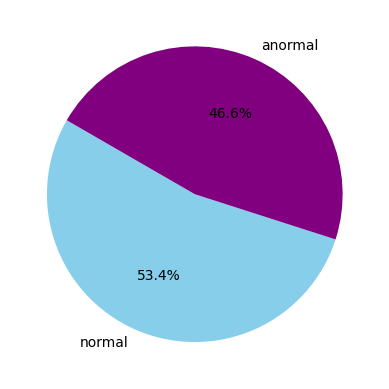

<Figure size 1152x864 with 0 Axes>

In [16]:
service_counts = df['class'].value_counts(ascending=False).values
plt.pie(service_counts, labels=["normal","anormal"], startangle=150,autopct='%1.1f%%', colors=['skyblue', 'purple']);
plt.figure(dpi=180)
plt.show()



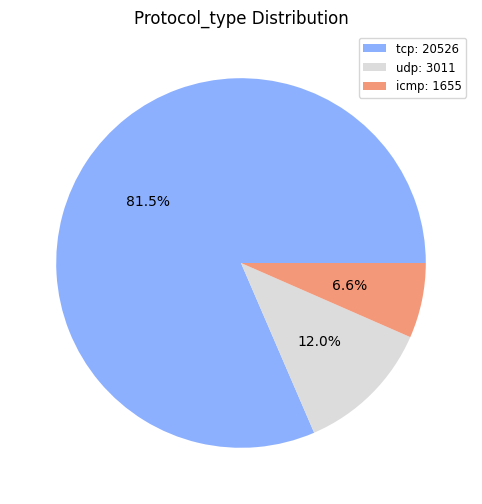

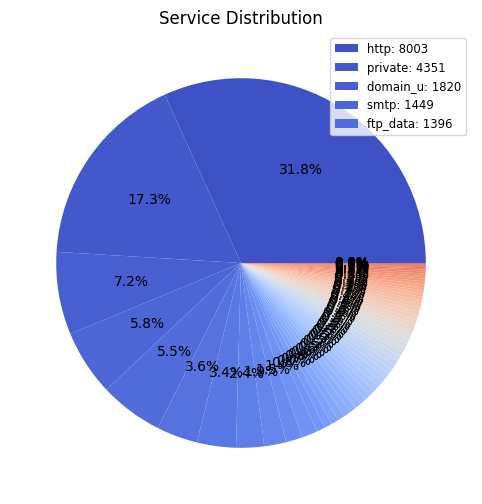

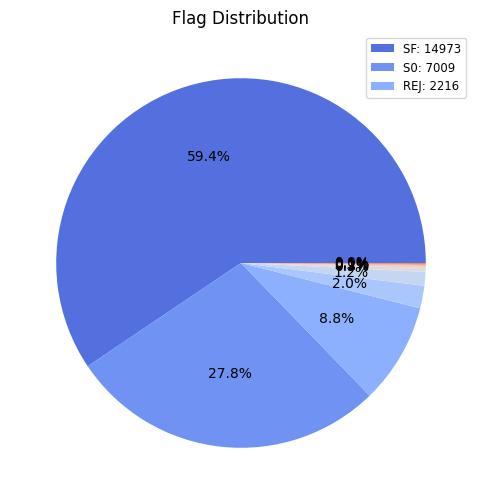

In [ ]:
threshold_percentage = 5  # Eşik yüzdesi

for category in ['protocol_type', 'service', 'flag']:
    abs_values = df[category].value_counts().values
    labels = df[category].value_counts().index
    colors = sns.color_palette("coolwarm", len(abs_values))

    plt.figure(figsize=(8, 6))
    pie = plt.pie(abs_values, labels=None, autopct='%1.1f%%', colors=colors)
    plt.title(f"{category.capitalize()} Distribution")

    # Renk eşleme tablosunu oluştur
    legend_labels = [f'{label}: {value}' for label, value in zip(labels, abs_values) if value / sum(abs_values) * 100 > threshold_percentage]
    plt.legend(legend_labels, loc='best', fontsize='small')

    plt.show()


##Kategorik Değişkenler İçin Uniq Değerler

In [ ]:
deger = ['protocol_type', 'service', 'flag']
for a in deger:
    print(a,"İçin Uniq Değerler ")
    unique = df[a].unique()
    print(unique)
    print(a," için Uniq Degerlerin Sayısı:", len(unique),"\n")

protocol_type İçin Uniq Değerler 
['tcp' 'udp' 'icmp']
protocol_type  için Uniq Degerlerin Sayısı: 3 

service İçin Uniq Değerler 
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001']
service  için Uniq Degerlerin Sayısı: 66 

flag İçin Uniq Değerler 
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
flag  için Uniq Degerlerin Sayısı: 11 



#Verileri Ölçeklendirme

In [ ]:
scaler = StandardScaler()
encoded_df = pd.get_dummies(df.drop(columns=['service']))
scaled_data = scaler.fit_transform(encoded_df.values)
encoded_df = pd.get_dummies(df)
scaled_data = scaler.fit_transform(encoded_df.values)
df_scaled = pd.DataFrame(scaled_data, columns=encoded_df.columns)
df_scaled


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,class_anomaly,class_normal
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.028884,-0.141864,-0.620862,-0.059207,-0.028884,-0.024409,0.826133,-0.04135,-0.934425,0.934425
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.028884,-0.141864,-0.620862,-0.059207,-0.028884,-0.024409,0.826133,-0.04135,-0.934425,0.934425
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.028884,-0.141864,1.610663,-0.059207,-0.028884,-0.024409,-1.210459,-0.04135,1.070177,-1.070177
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.028884,-0.141864,-0.620862,-0.059207,-0.028884,-0.024409,0.826133,-0.04135,-0.934425,0.934425
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.028884,-0.141864,-0.620862,-0.059207,-0.028884,-0.024409,0.826133,-0.04135,-0.934425,0.934425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.028884,-0.141864,-0.620862,-0.059207,-0.028884,-0.024409,-1.210459,-0.04135,1.070177,-1.070177
25188,-0.113551,-0.009954,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.028884,-0.141864,-0.620862,-0.059207,-0.028884,-0.024409,0.826133,-0.04135,1.070177,-1.070177
25189,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.028884,-0.141864,-0.620862,-0.059207,-0.028884,-0.024409,-1.210459,-0.04135,1.070177,-1.070177
25190,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.028884,-0.141864,1.610663,-0.059207,-0.028884,-0.024409,-1.210459,-0.04135,1.070177,-1.070177


#Korelasyon Grafiği

In [ ]:

encoder = ce.LeaveOneOutEncoder()

df['class'] = LabelEncoder().fit_transform(df['class'])

for sutun in df.columns:
    if sutun != 'class' and not is_numeric_dtype(df[sutun]):
        df[sutun] = encoder.fit_transform(df[sutun], df['class'])

<Axes: title={'center': 'Feature-correlation (pearson)'}>

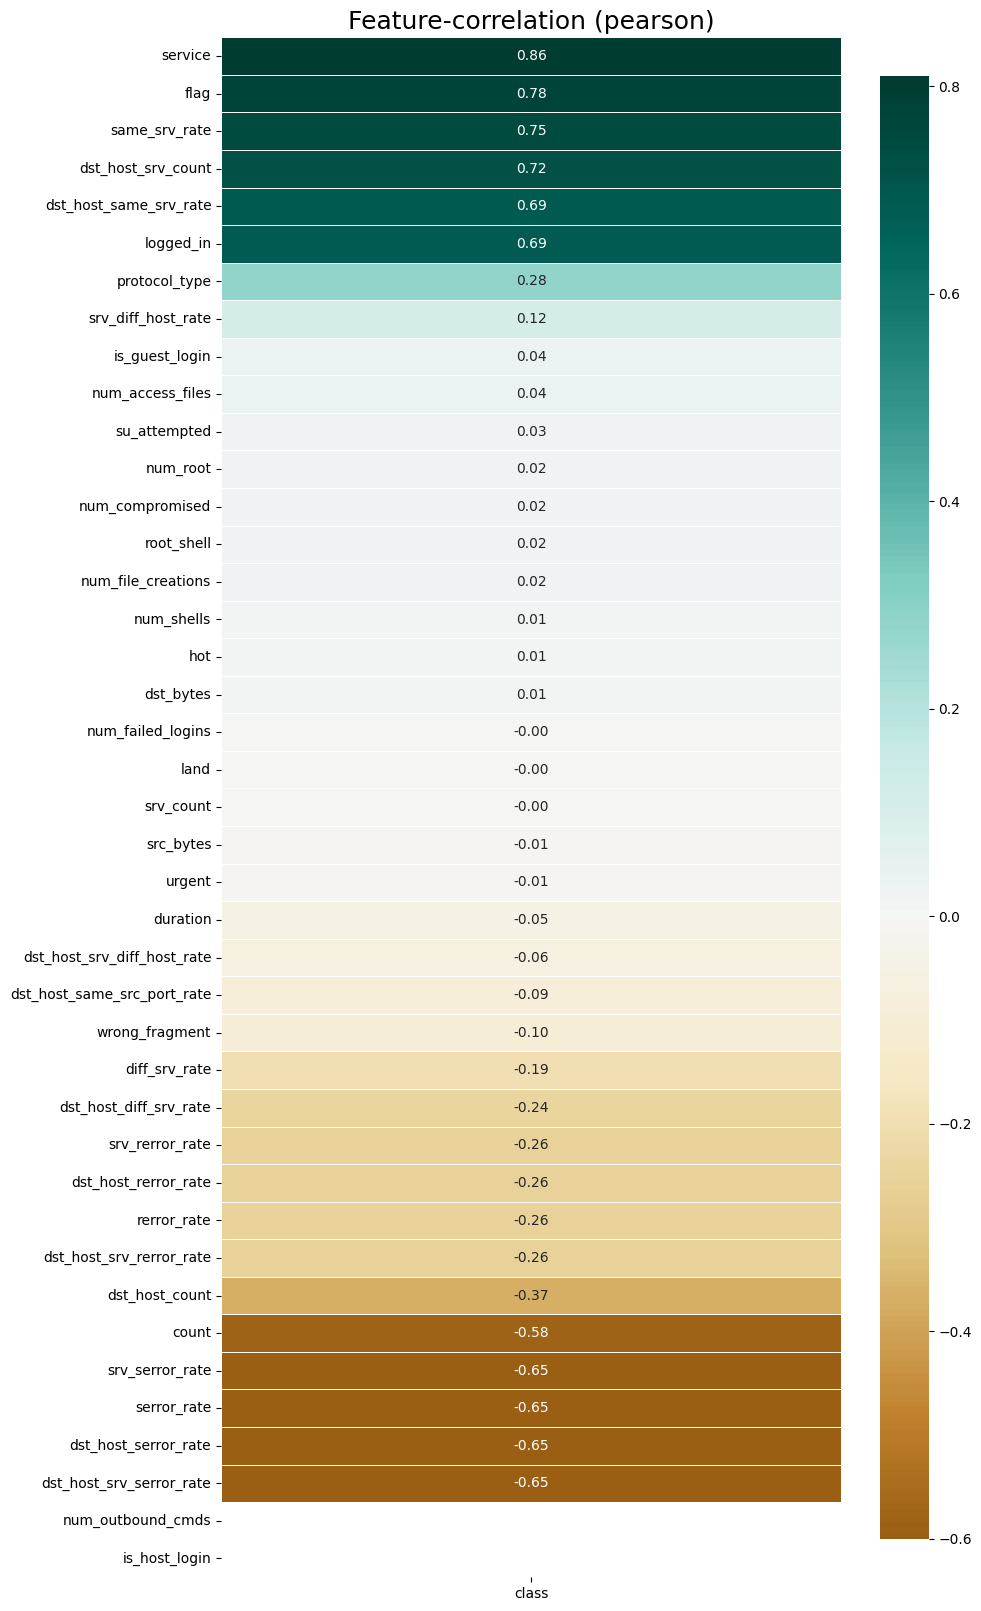

In [ ]:

kl.corr_plot(df,figsize=(10,20),target='class')

#Özelliklerin Önemli Olanlarının Belirlenmesi

In [ ]:
x = df.drop("class",axis=1)
y = df['class'] #bağımlı değişkenimiz

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=0.20,
                                                    random_state=23)

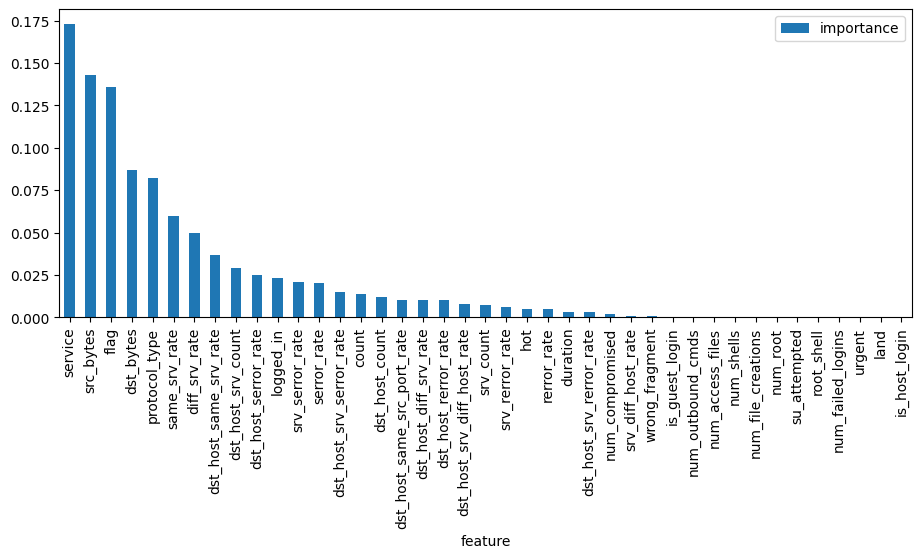

In [ ]:

rfc = RandomForestClassifier();


rfc.fit(x_train, y_train);

score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

##En Önemli 15 Özelliği Alma

In [ ]:


rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
select_features = [v for i, v in feature_map if i==True]

select_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'hot',
 'logged_in',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate']

#Modelleri Kurma

##Verileri Ayırma

In [ ]:
dfc=df[select_features]

In [ ]:
x = dfc
y = df['class'] #bağımlı değişkenimiz

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=0.20,
                                                    random_state=23)

In [ ]:


#K-Neighbors Classifier, n_jobs=-1 eğitim sürecini hızlandırmak için paralel çalışma
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(x_train, y_train);

#Logistic Regression
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(x_train, y_train);

#Decision Tree
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#Model Özetleri

In [ ]:


models = []
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, x_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(x_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(x_train))
    classification = metrics.classification_report(y_train, v.predict(x_train))
    print()
    print('============================== {} Model Çıktıları =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Decision Tree Classifier Model Çıktıları ==============================

Cross Validation Mean Score:
 0.9996023856858847

Model Accuracy:
 1.0

Confusion matrix:
 [[2324    0]
 [   0 2714]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2324
           1       1.00      1.00      1.00      2714

    accuracy                           1.00      5038
   macro avg       1.00      1.00      1.00      5038
weighted avg       1.00      1.00      1.00      5038



============================== KNeighborsClassifier Model Çıktıları ==============================

Cross Validation Mean Score:
 0.9777698886048787

Model Accuracy:
 0.9857086145295753

Confusion matrix:
 [[2280   44]
 [  28 2686]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2324
           1       0.98      0.99      0.99      2714

 